In [1]:
import numpy as np
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

## Step - 1 Generate data

In [2]:
X,y = make_regression(n_samples=500,n_features=10,n_informative=5,noise=2.,random_state=0)
print(X.shape, y.shape)
n_features = X.shape[1]

(500, 10) (500,)


In [3]:
pd.DataFrame(X).head()

,0,1,2,3,4,5,6,7,8,9
0,1.706468,1.511639,-0.000417,0.374155,0.073285,0.701783,0.409552,-0.461894,-0.626490,-0.799593
1,-1.616956,0.640132,-0.369182,-0.239379,-0.738031,-0.024326,1.099660,0.279925,-0.098150,0.655264
2,0.093953,-0.130107,0.929505,0.582225,-2.739677,0.943046,-2.094603,-0.569312,0.269904,0.123722
3,-1.542758,-0.789954,0.537035,-0.286835,-2.369623,-0.767332,1.634406,-0.260560,0.128957,0.571227
4,-0.101003,-2.231538,0.436187,1.571463,1.324868,-0.587375,1.077315,0.840648,0.261106,0.811090


### Step-2 normalize data

In [4]:
def normalise_data(X):
    return (X - X.mean(axis=0)) / X.std(axis=0)
X = normalise_data(X)

In [5]:
print(X.mean(axis=0))
print(X.std(axis=0))

[-2.90878432e-17  6.39488462e-17 -1.90958360e-17  4.88498131e-18
  1.93872696e-17  4.99600361e-17  9.00668429e-18  8.88178420e-19
  9.90318938e-17 -1.11910481e-16]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


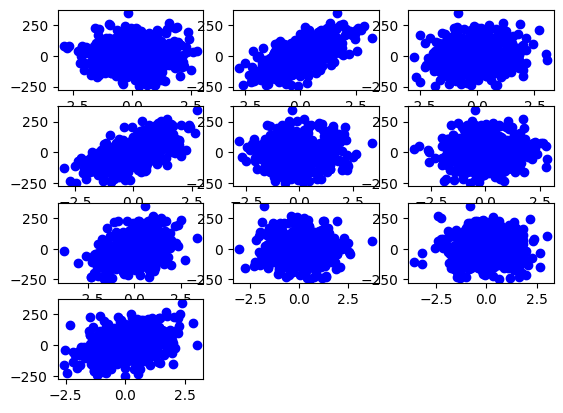

In [6]:
def plot_data(X,y,color='blue'):
    # visualize y as function of each feature
    for feature in range(10):
        plt.subplot(4,3,feature+1)
        plt.scatter(X[:, feature],y,c=color)
plot_data(X,y)
plt.show()


In [7]:
def train_test_split(X, split_ratio=0.7):
    m = X.shape
    
    combine_x_y = np.zeros((m[0],m[1]+1))
    combine_x_y[:, :-1] = X
    combine_x_y[:, -1] = y
    np.random.shuffle(combine_x_y)
    split = int(m[0]*split_ratio)
    
    XT = combine_x_y[:split, :-1] 
    yT = combine_x_y[:split, -1]
    Xt = combine_x_y[split:, :-1]
    yt = combine_x_y[split:, -1]
    return XT, yT, Xt, yt

In [8]:
XT, yT,Xt, yt = train_test_split(X)
XT.shape, yT.shape

((350, 10), (350,))

### Step - 5 Modeling / Linear Regression with Multiple features

In [9]:
def hypothesis(X, theta):
    return np.dot(X, theta)


In [10]:
def loss(X,y,theta):
    yp = hypothesis(X, theta)
    error = np.mean((yp - y)**2)
    return error

In [11]:
def gradients(X,y,theta):
    yp = hypothesis(X, theta)
    grads = np.dot(X.T,(yp-y))

    return grads / X.shape[0]


In [12]:
def preprocess(X):
    if X.shape[1] == n_features:
        ones = np.ones((X.shape[0],1))
        X = np.hstack((ones, X))
    return X

In [13]:
X = preprocess(X)
X.shape

(500, 11)

In [14]:
XT = preprocess(XT)
Xt = preprocess(Xt) 
XT.shape, Xt.shape

((350, 11), (150, 11))

In [15]:
def train(X,y,max_iterations=100, learning_rate=0.1):
    n = X.shape[1]
    theta = np.random.randn(n)
    loss_list = []
    for _ in range(max_iterations):
        loss_value = loss(X,y,theta)
        loss_list.append(loss_value)
        gradients_value = gradients(X,y,theta)
        theta = theta - (learning_rate * gradients_value)
    plt.plot(loss_list)
    return theta

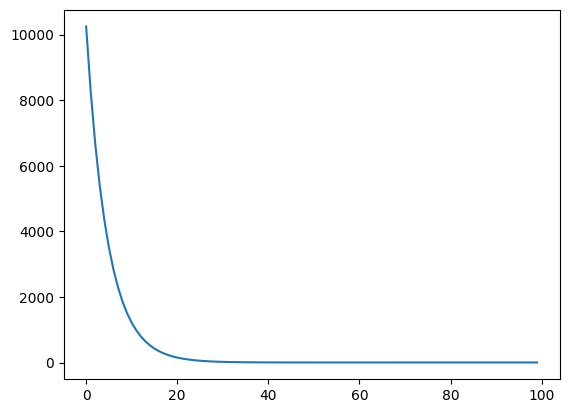

In [16]:
thetas = train(XT, yT)

In [17]:
X.shape,thetas.shape

((500, 11), (11,))

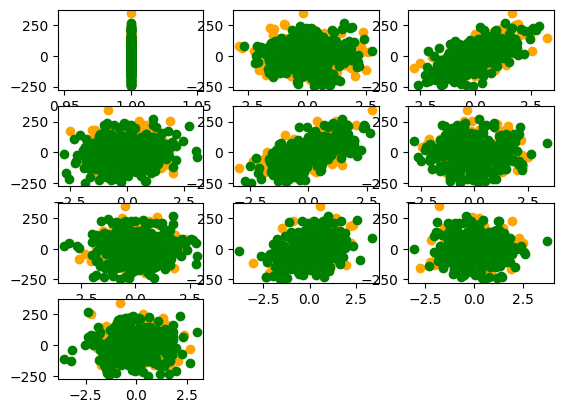

In [18]:
plot_data(Xt,yt, 'Orange')
plot_data(XT,yT, 'green')
plt.show()

In [19]:
Xt.shape,yt.shape,thetas.shape

((150, 11), (150,), (11,))

In [20]:
np.dot(Xt, thetas)

array([ -22.8741826 ,  110.17337249,   23.03578008,  -72.8278154 ,
        -18.057161  ,  -68.35649846,  -78.78569942,  -32.68329388,
        -60.10008159,   90.28508511, -106.53265826, -163.87371049,
         20.1196393 , -114.24610072,  -99.3776526 ,  -72.30540545,
       -108.82279648,  -51.17180158,    8.29921839,  -58.6879601 ,
         73.3523697 ,   19.37028609,  180.21060666,  -66.34302241,
       -116.75800876,    8.94047992,  -59.14570826,  -89.57188106,
        -21.36321178, -159.20496404,   64.56263938,   28.78979784,
        -48.52825624,  123.75614362,   50.02442311,  -51.7609858 ,
        172.84999793,  144.21721214,  -12.94356982,  -14.68834709,
         37.31771732,  101.04463195,   44.53587672, -139.27090876,
        344.21194742,  -61.23848993,  111.70180478,   83.08576355,
         28.40057782, -115.47497876,   42.54437669,  -14.74206882,
         44.74615231,  -13.63148386,  -45.1383289 , -158.00626931,
        140.54089231,  -24.68552274,  -50.09558975,  256.04326

In [21]:
def r2Score():
    yp = hypothesis(Xt, thetas)
    num = np.sum((yp - yt)**2)
    den = np.sum((yt-yt.mean())**2)

    return 1 - (num / den)

In [22]:
r2Score()

np.float64(0.9995898676888821)

## SK Learn based model

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
model = LinearRegression()
model.fit(XT,yT)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [25]:
yp = model.predict(Xt)

In [26]:
yp.shape

(150,)

In [27]:
model.score(Xt, yt)

0.9995899370151898

In [28]:
model.intercept_

np.float64(-3.740589775248346)

In [29]:
model.coef_

array([ 0.00000000e+00, -3.93781898e-03,  6.03842599e+01,  1.05454427e+01,
        6.36009040e+01, -7.45583106e-02, -2.33529350e-02,  4.09282836e+01,
       -8.84397185e-02,  1.72125252e-01,  2.53832781e+01])